In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()

print("Training data shape:", x_train.shape)   # (60000, 28, 28)
print("Test data shape:", x_test.shape)       # (10000, 28, 28)


2025-09-20 13:04:43.514064: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1758373483.760523      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1758373483.833261      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


In [6]:
# plot number by index/

def plot_number(idx):
    plt.xticks([])
    plt.yticks([])
    plt.xlabel([y_train[idx]])
    plt.imshow(x_train[idx],cmap=plt.cm.binary)

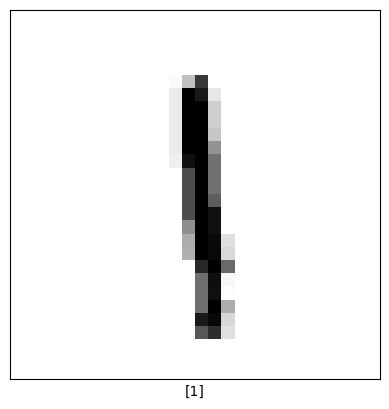

In [7]:
plot_number(8)

In [8]:
x_train=x_train.astype('float32')/255.0
x_test=x_test.astype('float32')/255.0


In [9]:


model=tf.keras.Sequential(
    [
        tf.keras.layers.Conv2D(32,(2,2),activation='relu',input_shape=(28,28,1)),
        tf.keras.layers.MaxPooling2D((2,2)),
        
        tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
        tf.keras.layers.MaxPooling2D((2,2)),
        
        
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64,activation='relu'),
        tf.keras.layers.Dense(10,activation='softmax')
    ]
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-09-20 13:05:03.931283: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [10]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [11]:
model_log=model.fit(x_train,y_train,epochs=5,validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 16ms/step - accuracy: 0.8971 - loss: 0.3353 - val_accuracy: 0.9764 - val_loss: 0.0771
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9829 - loss: 0.0560 - val_accuracy: 0.9842 - val_loss: 0.0447
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.9878 - loss: 0.0373 - val_accuracy: 0.9841 - val_loss: 0.0476
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9919 - loss: 0.0268 - val_accuracy: 0.9883 - val_loss: 0.0380
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9938 - loss: 0.0187 - val_accuracy: 0.9894 - val_loss: 0.0331


In [12]:
from sklearn.metrics import confusion_matrix
import numpy as np
y_pred=model.predict(x_test)
np.argmax(y_pred[0]) # return the index of max probability of predction of the tec classes also the index here represent the predicted number 

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


7

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


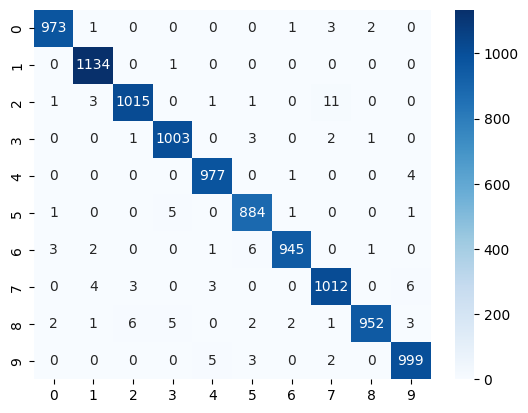

In [13]:

import seaborn as sns
y_pred = np.argmax(model.predict(x_test), axis=1)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.show()



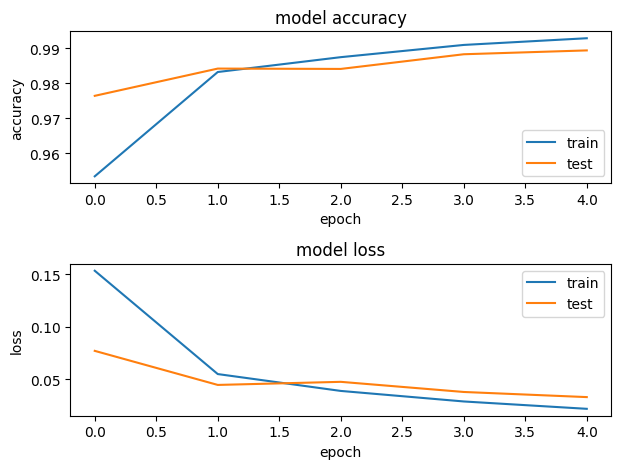

In [15]:
import os
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(model_log.history['accuracy'])
plt.plot(model_log.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.subplot(2,1,2)
plt.plot(model_log.history['loss'])
plt.plot(model_log.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()



In [17]:
score = model.evaluate(x_test, y_test, verbose=0)
score

[0.033116478472948074, 0.9894000291824341]

In [18]:
model.save("mnist_cnn.h5")
loaded_model = tf.keras.models.load_model("mnist_cnn.h5")
